Let us consider a database containing the relative consumption of certain food items in European countries.
The numbers represent the percentage of the population consuming that food type.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("https://openmv.net/file/food-consumption.csv").fillna(0)
data.describe()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
count,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,78.562500,39.250000,78.500000,16.875000,56.87500,49.000000,18.312500,12.750000,21.875000,15.87500,66.812500,70.500000,41.937500,55.187500,42.312500,75.812500,69.125000,54.187500,19.250000,27.750000
std,23.145824,23.147354,18.540047,11.453529,24.44279,15.427249,20.178268,9.574271,13.980343,12.78997,17.581122,14.033294,23.256451,22.592679,34.677022,20.910026,26.849891,28.842604,19.042059,25.026652
min,27.000000,10.000000,40.000000,0.000000,0.00000,27.000000,1.000000,2.000000,4.000000,2.00000,22.000000,42.000000,8.000000,16.000000,5.000000,31.000000,24.000000,13.000000,0.000000,3.000000
25%,71.500000,17.000000,62.500000,9.250000,49.00000,36.250000,3.750000,6.500000,13.750000,6.50000,56.750000,65.250000,28.000000,40.250000,11.000000,64.500000,47.750000,29.500000,4.500000,10.500000
50%,89.000000,39.000000,84.500000,17.000000,62.00000,47.000000,11.500000,10.000000,19.500000,13.00000,71.500000,72.000000,43.000000,54.000000,25.500000,83.000000,79.000000,52.500000,12.000000,21.000000
75%,96.000000,54.250000,92.250000,25.750000,74.50000,58.000000,20.000000,17.000000,26.250000,21.50000,81.000000,77.250000,50.750000,72.000000,81.500000,94.000000,94.000000,83.250000,30.250000,31.000000
max,98.000000,86.000000,99.000000,35.000000,91.00000,75.000000,76.000000,39.000000,54.000000,45.00000,87.000000,94.000000,89.000000,91.000000,91.000000,97.000000,97.000000,94.000000,57.000000,93.000000


In [2]:
A = data.to_numpy()[:, 1:].T.astype(np.float64)
countries = data.to_numpy()[:, 0]
foods = np.array(data.columns[1:])

Each column of the matrix A refers to a country, and each row represents a specific food. The arrays countries and foods contain the list of countries and foods, respectively.

1. How many samples and features are there in the dataset?

In [3]:
print(A.shape)
print("Number of samples: %d" % countries.shape[0])
print("Number of features: %d" % foods.shape[0])

(20, 16)
Number of samples: 16
Number of features: 20


There are 16 samples from 16 countries and 20 features, which represent the food.

2. Perform PCA on the dataset by means of the SVD decomposition. 

    Then, plot the trend of
    - the singular values $\sigma_k$;
    - the cumulate fraction of singular values $\frac{\sum_{i=1}^{k}\sigma_i}{\sum_{i=1}^{q}\sigma_i}$;
    - the fraction of the “explained variance” $\frac{\sum_{i=1}^{k}\sigma_i^2}{\sum_{i=1}^{q}\sigma_i^2}$;

In [4]:
# First center data
A_mean = np.mean(A, axis=1)
A_bar = A - A_mean[:, np.newaxis]
print(A_bar.shape)

U, s, VT = np.linalg.svd(A_bar, full_matrices=False)
print(U.shape)
# print(s.shape)
# print(VT.T.shape)

(20, 16)
(20, 16)


Text(0.5, 1.0, 'Explained variance')

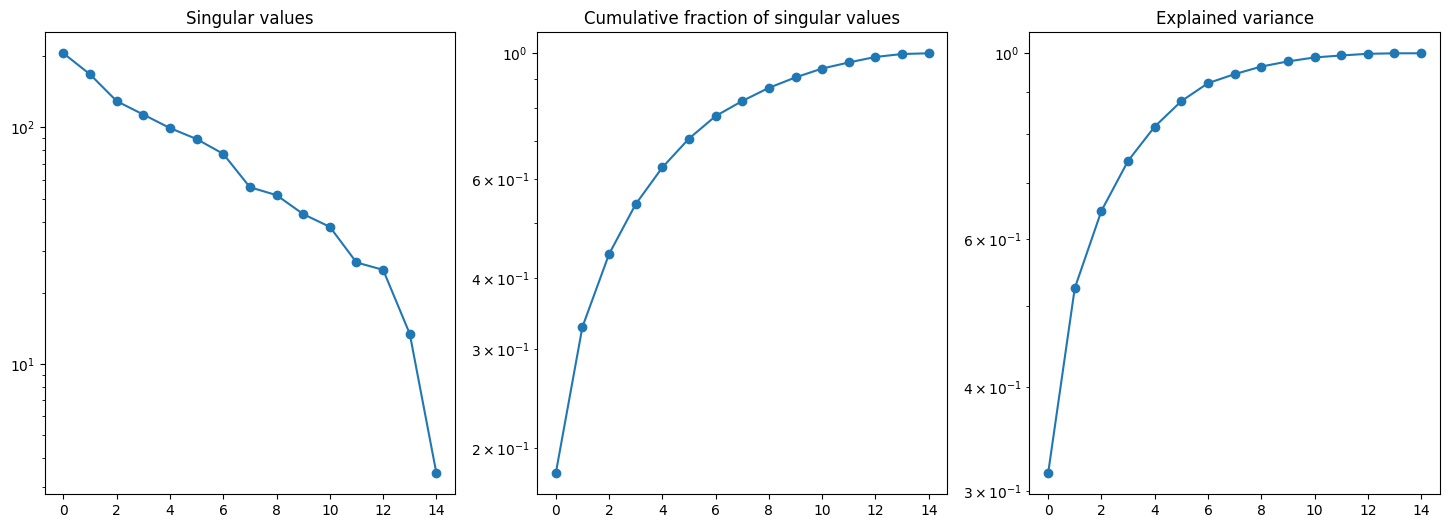

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axs[0].semilogy(s[:-1], "o-")
axs[0].set_title("Singular values")
axs[1].semilogy(np.cumsum(s[:-1]) / np.sum(s), "o-")
axs[1].set_title("Cumulative fraction of singular values")
axs[2].semilogy(np.cumsum(s[:-1] ** 2) / np.sum(s**2), "o-")
axs[2].set_title("Explained variance")

3. Print the first two principal directions. Which are the more important foods for these two directions? 

    Knowing that mediterranean cuisine envisages a large use of garlic and olive oil, compared to the European average, do you expect a positive or negative 1st principal component for Italy?

In [11]:
df = np.column_stack([foods, U[:, 0], U[:, 1]])
print("Important foods in the first direction")
print(foods[U[:, 0] > 0.2])
print("Not so important foods in the first direction")
print(foods[U[:, 0] < -0.25])
print("Important foods in the second direction")
print(foods[U[:, 1] > 0.3])
print("Not so important foods in the second direction")
print(foods[U[:, 1] < -0.1])

Important foods in the first direction
['Garlic' 'Olive oil']
Not so important foods in the first direction
['Tea' 'Tin soup' 'Tinned fruit' 'Jam']
Important foods in the second direction
['Instant coffee' 'Biscuits' 'Tinned fruit']
Not so important foods in the second direction
['Real coffee' 'Frozen fish' 'Crisp bread']


/tmp/ipykernel_18338/3354258174.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(foods, rotation=90)


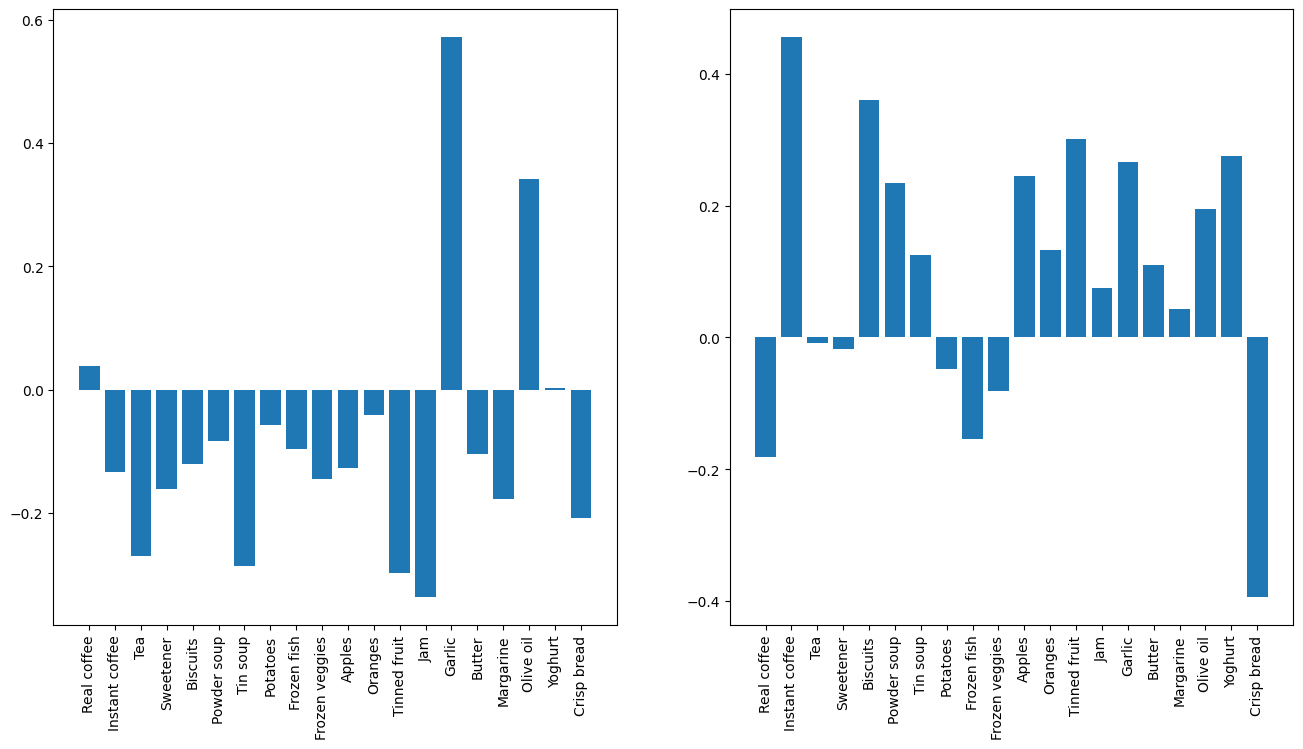

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
for i in range(2):
    axs[i].bar(foods, U[:, i])
    axs[i].set_xticklabels(foods, rotation=90)

Print the first two principal components. Based on these results:
- In which European region do you expect a large consume of crisp bread? Why? Is this confirmed by the original data?
- Which countries have food habits that are similar to Italy?
- Based on the two first principal components, what do you expect about the food habits in England? Is this confirmed by the original data?

In [8]:
# Columns of U are the principal directions, so to obtain
# the principal components I need to project the original
# (centered) data on these directions.
PHI = U.T @ A_bar
print(PHI.shape)

np.column_stack([countries, PHI[0, :], PHI[1, :], PHI[2, :]])

pd.DataFrame(
    {
        "country": countries,
        "1st comp.": PHI[0, :],
        "2nd comp.": PHI[1, :],
    }
)

(16, 16)


,country,1st comp.,2nd comp.
0,Germany,-22.581798,11.567864
1,Italy,79.898082,-9.456294
2,France,35.862663,44.017228
3,Holland,-62.095349,26.972304
4,Belgium,11.306679,18.499703
5,Luxembourg,18.991592,61.964708
6,England,-87.268471,62.515451
7,Portugal,89.796844,-25.074261
8,Austria,34.631345,-31.516487
9,Switzerland,9.095261,28.808163


- We expect a large consume of crisp bread in the countries where the second principal component have the lowest values, based on the principal directions analyzed before. In particular, we can see that the lowest values of the principal components are obtained in Sweden, Finland and Norway.
- Based on the first principal component, the countres where food habits are similar to Italy are Portugal and Spain (all these three have a very high first principal component).
- For England we expect habits where the first principal component is very very low, and second principal component medium-high: by analyzing the first two principal directions, based on this information, we can see that a low first principal component indicate a large use of Tea, Tin soup, Tinned fruit and Jam, and a low use of Garlic and Olive Oil, while a medium-high second principal component indicate a large use of Instant coffee, Biscuits and Tinned fruit (again), and a low use of Crisp Bread and Real Coffee.

Text(0, 0.5, '2nd principal component')

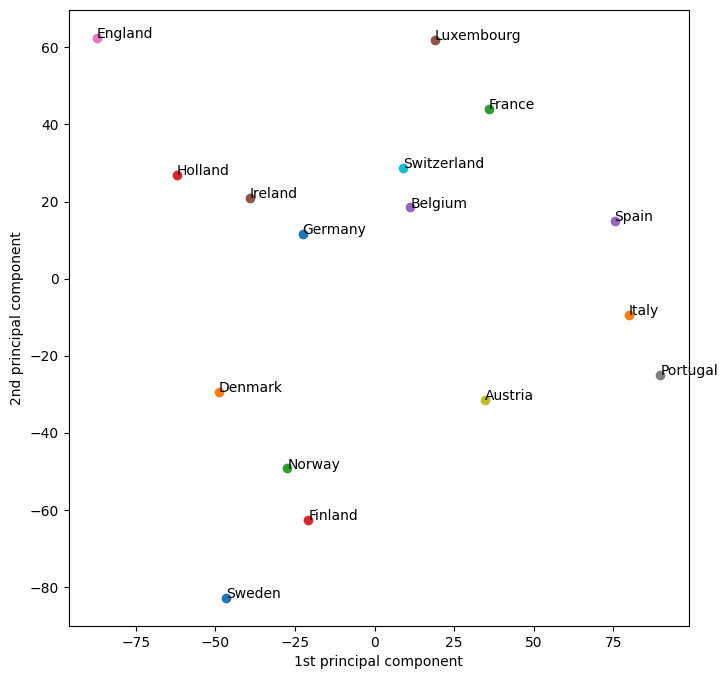

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
for i in range(16):
    axs.scatter(PHI[0, i], PHI[1, i])
    axs.annotate(countries[i], (PHI[0, i], PHI[1, i]))
axs.set_xlabel("1st principal component")
axs.set_ylabel("2nd principal component")